<a href="https://colab.research.google.com/github/ParkEunmi-19/ParkEunmi-19/blob/STUDY/train_normal_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import time
import gc
import sys
import pickle
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 
# open cv
import cv2
 
# visualization
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_pickle("./LSWMD.pkl") # 실제 Data

In [ ]:
#df.to_pickle("wafer.pickle")

In [ ]:
df = pd.read_pickle("wafer.pickle")
img_data = df["waferMap"].values

In [ ]:
df.shape

(811457, 6)

In [ ]:
df.head(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]]
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]]
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]]
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]]
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]]


In [ ]:
ttlabel = np.array(df["trianTestLabel"].values)
failuretype = np.array(df["failureType"].values)

In [ ]:
ttlabel = ttlabel.astype("object")
ttlabel = [ str(obj).replace("[[", "").replace("]]", "") for obj in ttlabel ]
ttlabel = np.array(ttlabel)

In [ ]:
failuretype = failuretype.astype("object")
failuretype = [ str(obj).replace("[[", "").replace("]]", "") for obj in failuretype ]
failuretype = np.array(failuretype)

In [ ]:
img_data.shape

(811457,)

In [ ]:
df["Label"]= ttlabel

In [ ]:
df["Type"]=failuretype

In [ ]:
df.head(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,Label,Type
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],'Training','none'
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],'Training','none'
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],'Training','none'
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],'Training','none'
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],'Training','none'
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]],'Training','none'
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]],'Training','none'
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]],'Training','none'
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]],'Training','none'
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]],'Training','none'


In [ ]:
df.drop(df.loc[df['Type']=="[]"].index, inplace=True)

In [ ]:
df.shape

(25519, 8)

In [ ]:
unique, counts = np.unique(df['Type'], return_counts = True)
dict(zip(unique, counts))

{"'Center'": 4294,
 "'Donut'": 555,
 "'Edge-Loc'": 5189,
 "'Edge-Ring'": 9680,
 "'Loc'": 3593,
 "'Near-full'": 149,
 "'Random'": 866,
 "'Scratch'": 1193}

In [ ]:
unique, counts = np.unique(df['Label'], return_counts = True)
dict(zip(unique, counts))

{"'Test'": 7894, "'Training'": 17625}

In [ ]:
df.head(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,Label,Type
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,[[Training]],[[Loc]],'Training','Loc'
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
40,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,16.0,[[Training]],[[Loc]],'Training','Loc'
41,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,17.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
42,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,18.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,19.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,20.0,[[Training]],[[Center]],'Training','Center'


In [ ]:
df = df.reset_index()

In [ ]:
df.head(10 )

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,Label,Type
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,[[Training]],[[Loc]],'Training','Loc'
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
5,40,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,16.0,[[Training]],[[Loc]],'Training','Loc'
6,41,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,17.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
7,42,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,18.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
8,43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,19.0,[[Training]],[[Edge-Loc]],'Training','Edge-Loc'
9,44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,20.0,[[Training]],[[Center]],'Training','Center'


In [ ]:
img_data = df["waferMap"].values

In [ ]:
ttlabel = np.array(df["Label"].values)
failuretype = np.array(df["Type"].values)

In [ ]:
#del df
gc.collect()

150

In [ ]:
# train and test data

# image data
train_img = img_data[ttlabel=="'Training'"]
test_img = img_data[ttlabel=="'Test'"]

# mode
train_mode = failuretype[ttlabel=="'Training'"]
test_mode = failuretype[ttlabel=="'Test'"]

In [ ]:
train_img.shape

(17625,)

In [ ]:
test_img.shape

(7894,)

In [ ]:
print(train_mode.shape,test_mode.shape)

(17625,) (7894,)


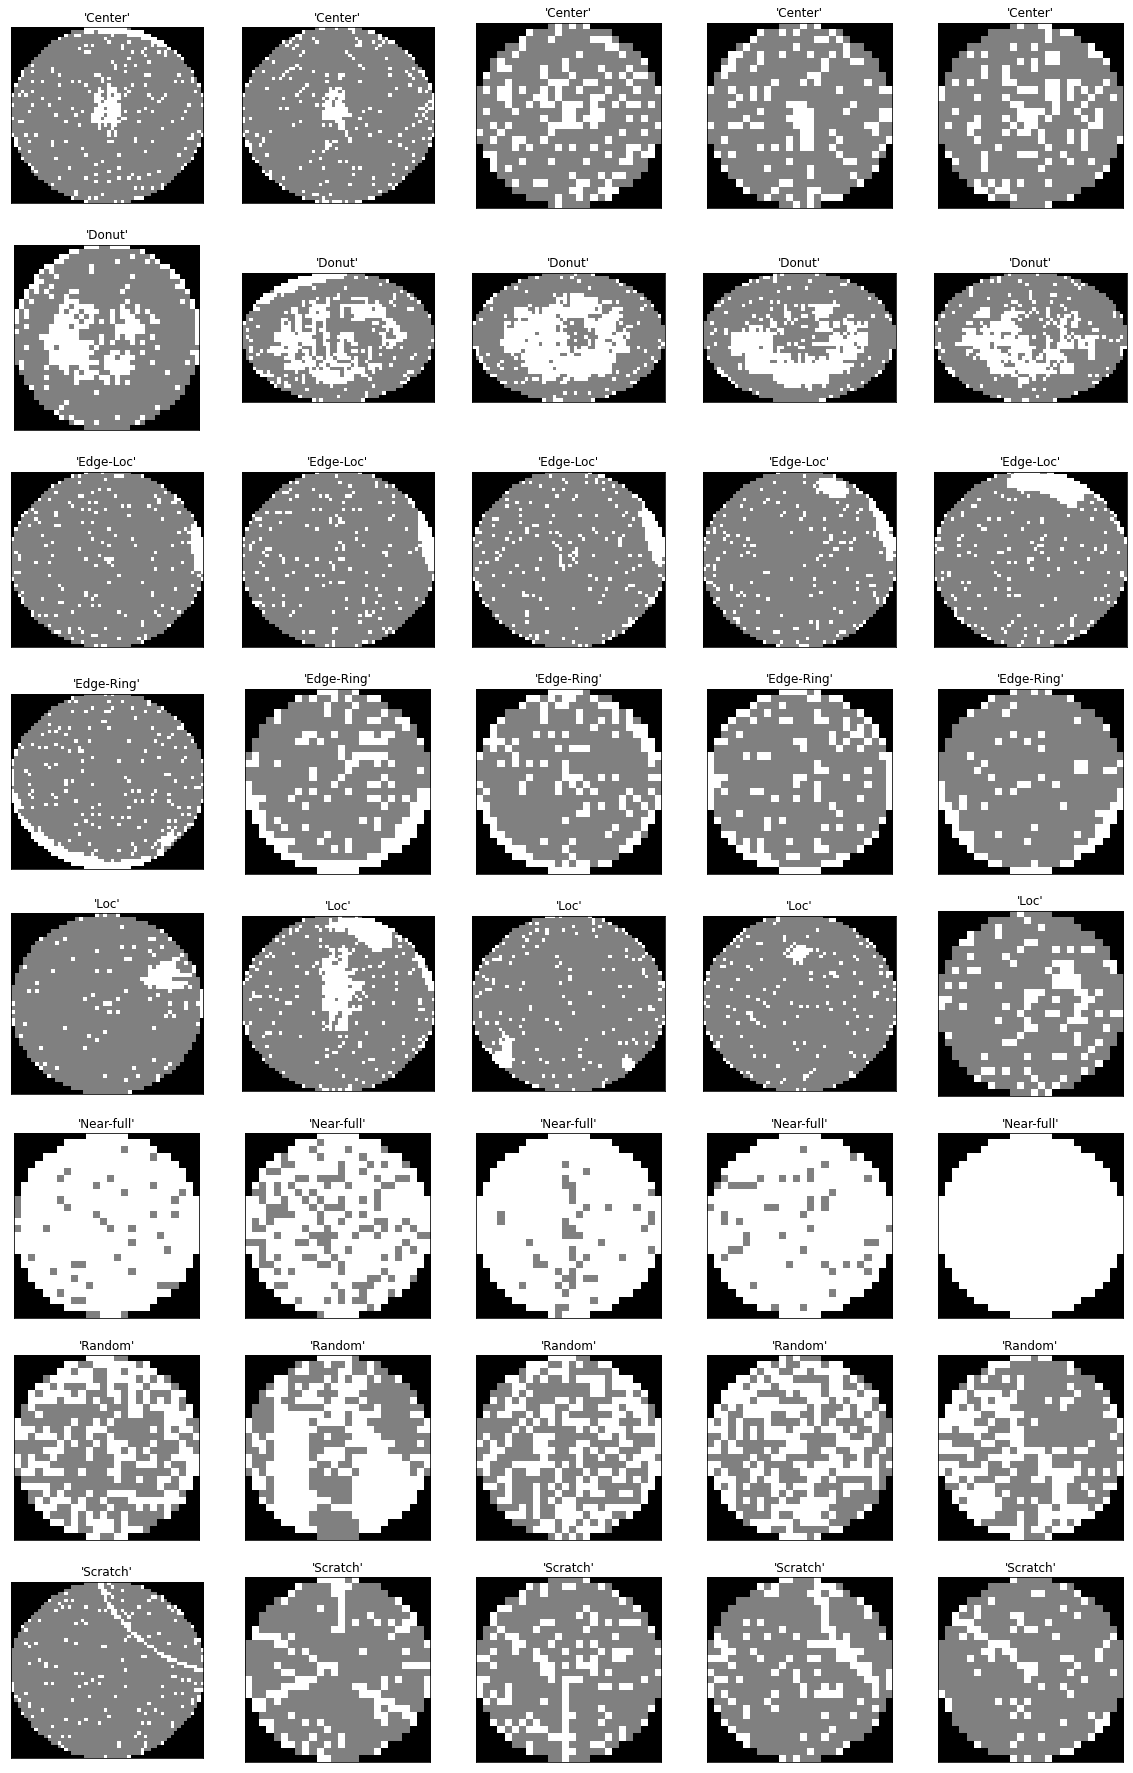

In [ ]:
mode = np.unique(train_mode)

fig, ax = plt.subplots(len(mode),5, figsize=(20,4*len(mode)))

for i in range(len(mode)):
    mode_img = train_img[train_mode==mode[i]]
    for j in range(5):
        img = mode_img[j]
    
        ax[i,j].imshow(img, cmap="gray")
        ax[i,j].grid([])
        ax[i,j].set_title(mode[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

In [ ]:
# change to image size (28,28)
train_img = np.array([cv2.resize(img, dsize=(96,96)) for img in train_img])
test_img = np.array([cv2.resize(img, dsize=(96,96)) for img in test_img])

In [ ]:
train_img = train_img/2*255

(17625, 28, 28)

In [ ]:
test_img.shape

(7894, 28, 28)

In [ ]:
train_mode[1]

"'Edge-Loc'"

In [ ]:
train = train_img.reshape(len(train_img),1,28,28)

In [ ]:
test = test_img.reshape(len(test_img),1,28,28)

In [ ]:
train.shape

(17625, 1, 28, 28)

In [ ]:
# change to binary, only failure chip
def bin_img(img, lwr_thre=1, upr_thre=2):
    ret,img = cv2.threshold(img, lwr_thre, upr_thre, cv2.THRESH_BINARY)
    img = img/2
    img = img.astype(np.float32)
    return img

train_img1 = np.array([bin_img(img) for img in train])
test_img1 = np.array([bin_img(img) for img in test])

In [ ]:
train_img1.shape

(17625, 1, 28, 28)

In [ ]:
test_img1.shape

(7894, 1, 28, 28)

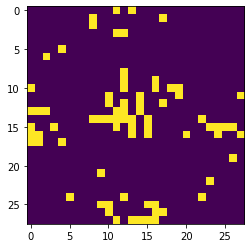

In [ ]:
plt.imshow(test_img1[1][0])

In [ ]:
np.save('./x_train_gray_wo.npy',train_img)

In [ ]:
np.save('./x_train_black_wo.npy',train_img1)

In [ ]:
np.save('./x_test_gray_wo.npy',test_img)

In [ ]:
np.save('./x_test_black_wo.npy',test_img1)

In [ ]:
np.save('./y_train_wo.npy',train_mode)

In [ ]:
np.save('./y_test_wo.npy',test_mode)

In [ ]:
test_mode[0:10]

array(["'Loc'", "'Loc'", "'Edge-Loc'", "'Edge-Loc'", "'Loc'", "'Loc'",
       "'Loc'", "'Loc'", "'Edge-Loc'", "'Edge-Loc'"], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

label_encoder.fit(train_mode)
label = label_encoder.transform(train_mode)

In [ ]:
train_mode.shape

(17625,)

In [ ]:
label

array([4, 2, 2, ..., 7, 2, 4])

In [ ]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
np.save('x_label_wo.npy', label)

In [ ]:
test_mode.shape

(7894,)

In [ ]:
label_encoder = LabelEncoder()

label_encoder.fit(test_mode)
test_label = label_encoder.transform(test_mode)

In [ ]:
np.unique(test_label)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
np.save('test_label_wo.npy',test_label)

In [ ]:
test_label.shape

(7894,)

In [ ]:
mode = np.unique(train_mode)

In [ ]:
print(mode)

["'Center'" "'Donut'" "'Edge-Loc'" "'Edge-Ring'" "'Loc'" "'Near-full'"
 "'Random'" "'Scratch'"]
